/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[ 5  5]
 [13 10]]
0.454545454545
             precision    recall  f1-score   support

          0       0.28      0.50      0.36        10
          1       0.67      0.43      0.53        23

avg / total       0.55      0.45      0.48        33



/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   class_0_pp  class_1_pp
0    0.834190    0.165810
1    0.575369    0.424631
2    0.212360    0.787640
3    0.882804    0.117196
4    0.882804    0.117196
5    0.910681    0.089319
6    0.871954    0.128046
7    0.804364    0.195636
8    0.525471    0.474529
9    0.892847    0.107153
   class_0_pp  class_1_pp  pred_class_thresh50
0    0.834190    0.165810                    0
1    0.575369    0.424631                    0
2    0.212360    0.787640                    1
3    0.882804    0.117196                    0
4    0.882804    0.117196                    0
5    0.910681    0.089319                    0
6    0.871954    0.128046                    0
7    0.804364    0.195636                    0
8    0.525471    0.474529                    0
9    0.892847    0.107153                    0
            predicted_cancer  predicted_healthy
has_cancer                65                 15
is_healthy                 4                147
   class_0_pp  class_1_pp  pred_class_thresh50  pred_

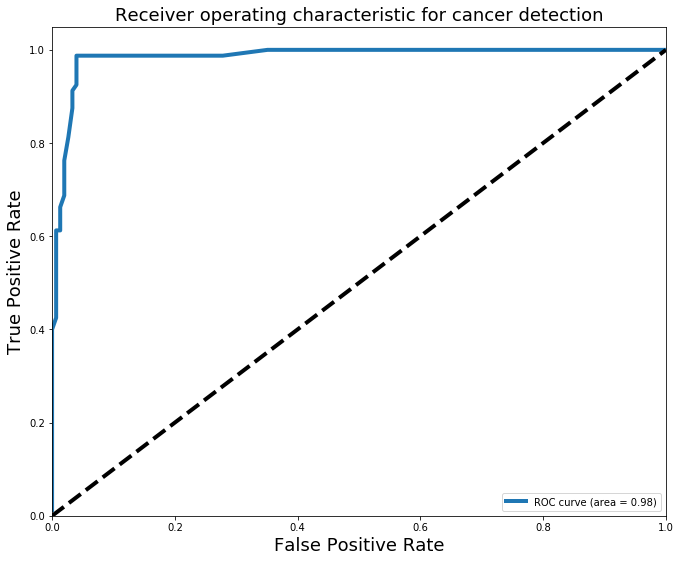

'\nWhat is the intuition for the ROC curve?\nAs the class assignment threshold increases for the positive class (has cancer), the false positive rate and true positive rate necessarily increase.\nFor a classifier performing at chance, this would be the diagonal dotted line: an equal chance of false positives and true positives.\nThe greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient.\nThus, the greater the area under the curve, the higher the quality of the classification model. In the Wisconsin breast cancer data the area under the curve is 0.99, indicating a nearly perfect model. Most classification problems will never get close to this!\n'

In [2]:
'''
Logisitic Regression Review
'''

from sklearn.linear_model import LogisticRegression
import numpy as np

# Set up fake X and Y
X = np.random.randn(100, 3)
Y = np.random.binomial(1, 0.5, 100)

logreg = LogisticRegression()
logreg.fit(X, Y)

# coefficients:
logreg.coef_
logreg.intercept_

X_new = np.random.randn(100, 3)

# predict class:
y_pred = logreg.predict(X_new)

# predicted probability:
y_pp = logreg.predict_proba(X_new)

'''
Exploring evaluation metrics
'''

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
X_train.size


logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)


from sklearn.metrics import confusion_matrix

confusion = np.array(confusion_matrix(Y_test, Y_pred))

print(confusion)

# calculate true positives, the number of 1s correctly predicted to be 1
TP = confusion[0,0]

# calculate false positives, the number of 0s incorrectly predicted to be 1
FP  = confusion[1,0]

# calculate true negatives, the number of 0s correctly predicted to be 0
TN = confusion[1,1]

# calculate false negatives, the number of 1s incorrectly predicted to be 0
FN = confusion[0,1]


# Accuracy is simply the proportion of classes correctly predicted by the model.
#   Accuracy = (True Positives + True Negatives) / Total

from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print(acc)



# Classification Report

from sklearn.metrics import classification_report

# Example printout:
print(classification_report(Y_test, Y_pred))

'''
Remember...
  Precision = True Positives / (True Positives + False Positives)
A precision score of 1 indicates that the classifier never mistakenly added observations from another class. A precision score of 0 would mean that the classifier misclassified every instance of the current class.
  Recall = True Positives / (True Positives + False Negatives)
A recall score of 1 indicates that the classifier correctly predicted (found) all observations of the current class (by implication, no false negatives, or misclassifications of the current class). A recall score of 0 alternatively means that the classifier missed all observations of the current class.
  F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once.
support is simply the number of observations of the labelled class.
'''


'''
AUC and ROC Graphs
'''

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

column_names = ['id',
                'clump_thickness',
                'cell_size_uniformity',
                'cell_shape_uniformity',
                'marginal_adhesion',
                'single_epithelial_size',
                'bare_nuclei',
                'bland_chromatin',
                'normal_nucleoli',
                'mitoses',
                'class']

bcw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = column_names)


bcw.dropna(inplace=True)
bcw['metrics_pct'] = bcw[[x for x in column_names if x not in ['class','id']]].sum(axis=1)/90.
bcw['class'] = bcw['class'].map(lambda x: 0 if x == 2 else 1)


metrics_pct = np.array(bcw.metrics_pct.values)
metrics_pct = metrics_pct[:, np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(metrics_pct, bcw[['class']].values, 
                                                    test_size=0.33, stratify=bcw[['class']].values,
                                                    random_state=77)

logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)


# Get the predicted probability vector
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
print(Y_pp.iloc[0:10])

# This behavior is equivalent to a classification threshold of 0.5 for class 1. In other words, if class 1's predicted probability is >= 0.5, the observation is predicted to be class 1.
Y_pp['pred_class_thresh50'] = Y_pred
print(Y_pp.iloc[0:10])

# Let's say again that we are predicting cancer based on some kind of detection measure, as before.
conmat = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['has_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

print(confusion)


# In order to do this, we can lower the threshold for predicting class 1.

# This will reduce our false negative rate to 0, but at the expense of our false positive rate.
Y_pp['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp.class_1_pp.values]
print(Y_pp.iloc[0:10])


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
%matplotlib inline



Y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

'''
What is the intuition for the ROC curve?
As the class assignment threshold increases for the positive class (has cancer), the false positive rate and true positive rate necessarily increase.
For a classifier performing at chance, this would be the diagonal dotted line: an equal chance of false positives and true positives.
The greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient.
Thus, the greater the area under the curve, the higher the quality of the classification model. In the Wisconsin breast cancer data the area under the curve is 0.99, indicating a nearly perfect model. Most classification problems will never get close to this!
'''